In [1]:
from spherical_cartesian_conversion import (
    cartesian_to_spherical, 
    spherical_to_cartesian, 
    norm_cartesian_to_spherical, 
    norm_spherical_to_cartesian
    )

from scipy.spatial.transform import Rotation as R
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull


%matplotlib widget

In [2]:
def rotate_coords_from_axis(axis, coords):
    # Cartesian coordinate transformation that rotates the z axis to the defined axis
    r, _ = R.align_vectors([axis], [[0, 0, 1]])
    return r.apply(coords)

def get_rotation(axis):
    r, _ = R.align_vectors([axis], [[0, 0, 1]])
    return r

def rotate_coords(r, coords):
    return r.apply(coords)

In [3]:
phi = 0
theta = 90

x, y, z = norm_spherical_to_cartesian(theta, phi)
# x, y, z = [0, 1, 0]

final = [round(coord, 3) for coord in [x, y, z]]

print(final)

[1.0, 0.0, 0.0]


In [4]:
# final = [[1, 1, 1]]
vertices_pre = [[0, 0, 0], [1, 0, 0], [0, 2, 0], [0, 0, 3]]
r = get_rotation(final)
print(r.as_matrix())
vertices_post = [r.apply(vertex) for vertex in vertices_pre]
print(vertices_post)


[[ 0.  0.  1.]
 [-1.  0.  0.]
 [ 0. -1.  0.]]
[array([0., 0., 0.]), array([ 0., -1.,  0.]), array([ 0.,  0., -2.]), array([3., 0., 0.])]


C:\Users\jacob\AppData\Local\Temp\ipykernel_10428\2095550012.py:7: UserWarning: Optimal rotation is not uniquely or poorly defined for the given sets of vectors.
  r, _ = R.align_vectors([axis], [[0, 0, 1]])


In [5]:
def plot_polyh(vertices):
    vertices = np.array(vertices)
    ax = plt.figure().add_subplot(projection="3d")
    ax.set_aspect('equal')
    ax.set_xlim3d([-3, 3])
    ax.set_ylim3d([-3, 3])
    ax.set_zlim3d([-3, 3])
    ax.set_xlabel('x-axis') 
    ax.set_ylabel('y-axis') 
    ax.set_zlabel('z-axis')
    hull = ConvexHull(vertices)
    # draw the polygons of the convex hull
    for s, color in zip(hull.simplices, ['r', 'g', 'b', 'k']):
        tri = Poly3DCollection([vertices[s]])
        tri.set_color(color)
        tri.set_alpha(0.5)
        ax.add_collection3d(tri)
    # draw the vertices
    ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], marker='o', color='purple')
    plt.show()

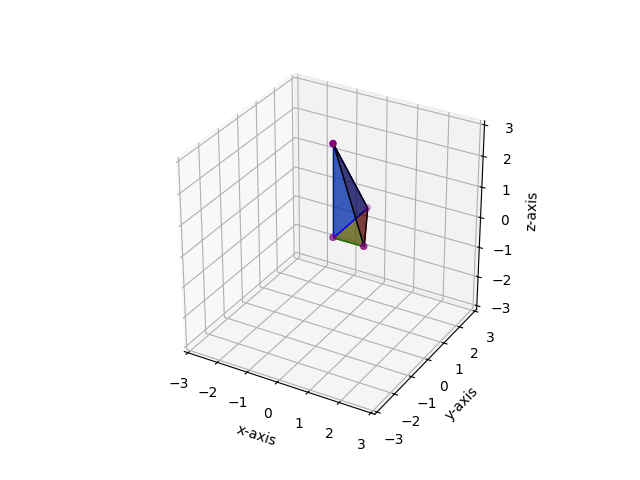

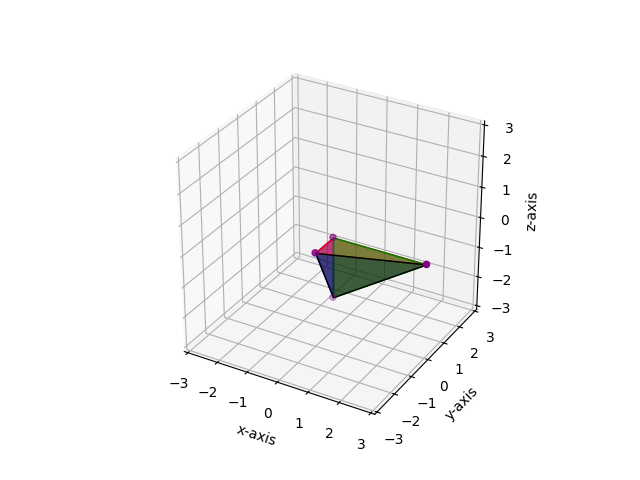

In [6]:
plot_polyh(vertices_pre)
plot_polyh(vertices_post)

In [7]:
# TODO: Test visualizing with a 3D object
# ax = plt.figure().add_subplot(projection='3d')

# vectors = [[0, 0, 1], final, point1, point2]

# # Make the grid
# x, y, z = [np.zeros(len(vectors)) for _ in range(3)]

# # Make the direction data for the arrows
# u = [vector[0] for vector in vectors]
# v = [vector[1] for vector in vectors]
# w = [vector[2] for vector in vectors]

# ax.quiver(x, y, z, u, v, w, length=0.1, normalize=True, color=['r', 'g', 'b', 'k'])

# plt.show()